In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Create data frame
mycolumns = [
    'data','platform','lang',
    'pixeldata.read','pixeldata.read.init','pixeldata.read.pixels',
    'pixeldata.write','pixeldata.write.init','pixeldata.write.pixels']
d = pd.DataFrame(columns=mycolumns)

# Read all CSV files into a data frame
for data in ['bbbc', 'mitocheck']:
    for platform in ['win', 'linux']:
        for lang in ['cpp', 'java']:
            if lang == 'java':
                name_col = 'test.lang'
            else:
                name_col = 'test.name'
   
            # Read initial csv table
            file_name = 'results/' + data + '-pixeldata-' + platform + '-' + lang + '.tsv'
            table = pd.read_table(file_name,dtype={name_col: str})
            
            # Store each run as a row
            if lang == 'java':
                m = table.groupby(['test.name']).mean()
                m = m['real']
            else:
                m = table.groupby(['test.lang']).mean()
                m = m['test.file']
            m['data'] =  data
            m['platform'] = platform
            m['lang'] = lang
            d.loc[len(d)] = m
            
d

,data,platform,lang,pixeldata.read,pixeldata.read.init,pixeldata.read.pixels,pixeldata.write,pixeldata.write.init,pixeldata.write.pixels
0,bbbc,win,cpp,764210.000000,448454.400000,315755.600000,1.757503e+06,2302.800000,1.755200e+06
1,bbbc,win,java,154155.000000,2429.200000,151725.400000,4.434706e+05,5.200000,4.434648e+05
2,bbbc,linux,cpp,178943.333333,112620.000000,66323.333333,1.954433e+05,2026.666667,1.934167e+05
3,bbbc,linux,java,97849.666667,1594.000000,96254.666667,1.356660e+05,6.666667,1.356583e+05
4,mitocheck,win,cpp,72975.000000,71956.800000,1018.200000,1.193306e+05,1749.200000,1.175814e+05
5,mitocheck,win,java,2231.200000,682.800000,1548.200000,1.200780e+04,0.800000,1.200680e+04
6,mitocheck,linux,cpp,56796.666667,56123.333333,673.333333,1.222333e+04,1636.666667,1.058667e+04
7,mitocheck,linux,java,1550.000000,602.666667,946.666667,5.280667e+03,1.000000,5.279333e+03


In [3]:
# d.columns = [c.replace('.', '_') for c in d.columns]
# d.groupby(['data', 'platform']).pixeldata_read.size().unstack().plot(kind='bar', stacked=True)


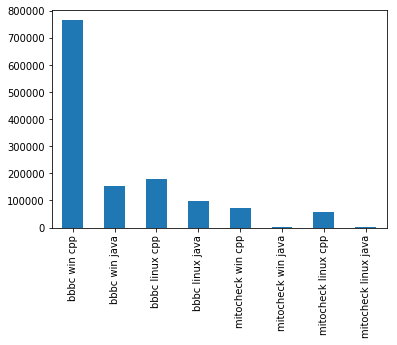

In [4]:
f= plt.figure()
ax = d['pixeldata.read'].plot(kind='bar')
ax.set_xticklabels(d.data + ' ' + d.platform + ' ' + d.lang)
plt.show()

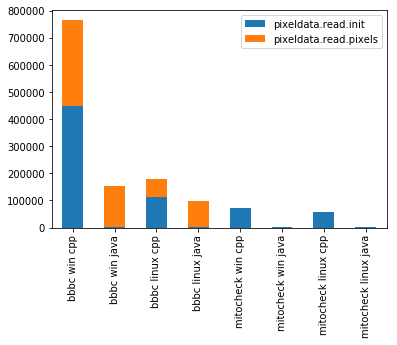

In [5]:
plt.figure()
cols = ['pixeldata.read.init', 'pixeldata.read.pixels']
ax = d[cols].plot(kind='bar',stacked=True)
ax.set_xticklabels(d.data + ' ' + d.platform + ' ' + d.lang)
plt.show()

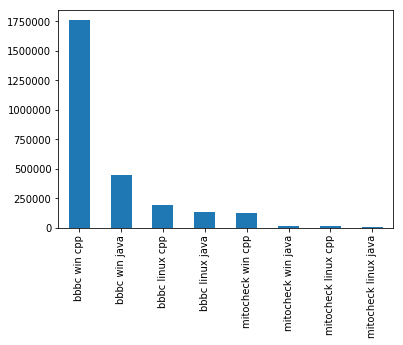

In [6]:
plt.figure()
ax = d['pixeldata.write'].plot(kind='bar')
ax.set_xticklabels(d.data + ' ' + d.platform + ' ' + d.lang)
plt.show()

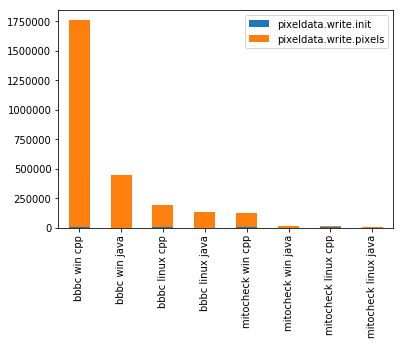

In [7]:
plt.figure()
cols = ['pixeldata.write.init', 'pixeldata.write.pixels']
ax = d[cols].plot(kind='bar',stacked=True)
ax.set_xticklabels(d.data + ' ' + d.platform + ' ' + d.lang)
plt.show()